In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.simplefilter(action='ignore')

In [2]:
test_df = pd.read_csv('test.csv', index_col=0)
train_df = pd.read_csv('train.csv', index_col=0)
code_d = pd.read_csv('D_code_new.csv')
code_h = pd.read_csv('H_code_new.csv')
code_l = pd.read_csv('L_code.csv')
submission_df = pd.read_csv('sample_submission.csv')
# code_d.drop(labels='Unnamed: 5', axis=1, inplace=True)

for i in ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn'] :
    train_df[i] = train_df[i].astype('int')
    test_df[i] = test_df[i].astype('int')

In [4]:
# target 비율
train_df.target.value_counts(sort=False)/len(train_df)

0    0.50026
1    0.49974
Name: target, dtype: float64

In [9]:
# null 수
sum(train_df[train_df.isna()].count()) # 0
sum(test_df[test_df.isna()].count())   # 0

0

In [10]:
train_person_df = train_df.iloc[:,7:19]
train_content_df = train_df.iloc[:,19:30]
test_person_df = test_df.iloc[:,7:19]
test_content_df = test_df.iloc[:,19:30]

# random forest baseline 0.62704

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# train_x = train_df.iloc[:,:30]
# train_y = train_df.iloc[:,[-1]]
# test_x = test_df.iloc[:,:30]
# test_y = test_df.iloc[:,[-1]]

# rf = RandomForestClassifier(max_depth=20)
# rf.fit(train_x, train_y)
# print(rf.score(train_x, train_y))  # 0.8726947451046019
# pred_y = rf.predict(test_x)

# submission_df['target'] = pred_y
# # submission_df.to_csv('sub1.csv', index=False)

In [13]:
code_d.columns = ['d_code', 'd_section_code', 'd_small_code', 'd_midium_code', 'd_large_code']
code_l.columns = ['l_code', 'l_section_code', 'l_small_code', 'l_midium_code', 'l_large_code']
code_h.columns = ['h_code', 'h_midium_code', 'h_large_code']

In [32]:
TARGET = test_person_df

d = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']
h = ['person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3']

person_res_d = pd.DataFrame()
person_res_h = pd.DataFrame()

for idx in tqdm(range(len(TARGET))):
    tmp_d = pd.DataFrame()
    tmp_h = pd.DataFrame()
    for col in d :  # ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']  #  ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_d[code_d['d_code']==tmp_code_num]
        t.drop('d_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_d = pd.concat([tmp_d, t], axis=1)
    person_res_d = person_res_d.append(tmp_d, ignore_index=True)
    
    for col in h :  # ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3']  #  ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_h[code_h['h_code']==tmp_code_num]
        t.drop('h_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_h = pd.concat([tmp_h, t], axis=1)
    person_res_h = person_res_h.append(tmp_h, ignore_index=True)
    
    
# res.to_csv('person_d_code_detail.csv', index=False)

  0%|          | 0/46404 [00:00<?, ?it/s]

In [33]:
# content

d = ['contents_attribute_d']
h = ['contents_attribute_h']
l = ['contents_attribute_l']

TARGET = test_content_df

content_res_d = pd.DataFrame()
content_res_h = pd.DataFrame()
content_res_l = pd.DataFrame()

for idx in tqdm(range(len(TARGET))):
    tmp_d = pd.DataFrame()
    tmp_h = pd.DataFrame()
    tmp_l = pd.DataFrame()
    for col in d :  # ['contents_attribute_d']
        tmp_code_num = TARGET[col][idx]
        t = code_d[code_d['d_code']==tmp_code_num]
        t.drop('d_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_d = pd.concat([tmp_d, t], axis=1)
    content_res_d = content_res_d.append(tmp_d, ignore_index=True)
    
    for col in h :
        tmp_code_num = TARGET[col][idx]
        t = code_h[code_h['h_code']==tmp_code_num]
        t.drop('h_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_h = pd.concat([tmp_h, t], axis=1)
    content_res_h = content_res_h.append(tmp_h, ignore_index=True)
    
    for col in l : 
        tmp_code_num = TARGET[col][idx]
        t = code_l[code_l['l_code']==tmp_code_num]
        t.drop('l_code', axis=1, inplace=True)
        t.index = [idx]
        t = t.add_prefix(col)
        tmp_l = pd.concat([tmp_l, t], axis=1)
    content_res_l = content_res_l.append(tmp_l, ignore_index=True)
    
# content_res_l.to_csv('content_l_code_detail.csv', index=False)
# content_res_h.to_csv('content_h_code_detail.csv', index=False)
# content_res_d.to_csv('content_d_code_detail.csv', index=False)

  0%|          | 0/46404 [00:00<?, ?it/s]

In [34]:
new_train_x = pd.concat([train_df.iloc[:,[0,1,2,3,4,5,30,31]], train_person_df, person_res_d, person_res_h, train_content_df, content_res_d, content_res_h, content_res_l], axis=1)
new_train_y = train_df.iloc[:,[-1]]

new_test_x = pd.concat([test_df.iloc[:,[0,1,2,3,4,5,30,31]], test_person_df, person_res_d, person_res_h, test_content_df, content_res_d, content_res_h, content_res_l], axis=1)

In [146]:
from sklearn.model_selection import train_test_split

new_train_x, new_val_x, new_train_y, new_val_y = train_test_split(new_train_x, new_train_y, test_size=0.3 ,random_state=777)

In [41]:
from sklearn.ensemble import RandomForestClassifier

for i in tqdm([20,25,30,35,40]) :
    rf = RandomForestClassifier(max_depth=i, random_state=777)
    rf.fit(new_train_x, new_train_y)
    score = rf.score(new_val_x, new_val_y)  # 0.8610222910204383
    
    print(f'max_depth : {i}')
    print(f'  score   : {score}')
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

max_depth : 20
  score   : 0.6143439901337634

max_depth : 25
  score   : 0.6142301489422256

max_depth : 30
  score   : 0.6127597002181956

max_depth : 35
  score   : 0.6117256427283939

max_depth : 40
  score   : 0.6111090029408974



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

model = GradientBoostingClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('GradientBoostingClassifier : ',score)

model = AdaBoostClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('AdaBoostClassifier : ',score)

model = ExtraTreesClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('ExtraTreesClassifier : ',score)

model = BaggingClassifier(random_state=777)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('BaggingClassifier : ',score)

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=30)
model.fit(new_train_x, new_train_y)
score = model.score(new_val_x, new_val_y)
print('XGBClassifier : ',score)

GradientBoostingClassifier :  0.6014135281282611
AdaBoostClassifier :  0.5931315814438858
ExtraTreesClassifier :  0.604961578597856
BaggingClassifier :  0.5761977042026373
[01:24:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier :  0.5920216298263922


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [5],  # 200,400,600
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],  #  
    'max_depth' : [10, 20]  # 
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, scoring='accuracy', n_jobs=-1, cv=3 ,verbose=10)
xgb_grid.fit(new_train_x, new_train_y)

In [ ]:
print('최고 평균 정확도 : {0: .4f}'.format(xgb_grid.best_score_))
print('최고의 파라미터 : ', xgb_grid.best_params_ )

In [ ]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

In [10]:
import lightgbm as lgb

In [45]:
params = {
    'learning_rate' : 0.05,
        'max_depth' : 32,
    'objective' : 'binary',
    'metric' : 'binary_logloss',
    'is_training_metric' : True,
    'num_leave' : 144,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.7,
    'bagging_freq':5,
    'seed':2020
}

In [46]:
train_dataset = lgb.Dataset(new_train_x, label=new_train_y)
val_dataset = lgb.Dataset(new_val_x, label=new_val_y)

model = lgb.train(params, train_dataset, 1000, val_dataset, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 122741, number of negative: 123214
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5798
[LightGBM] [Info] Number of data points in the train set: 245955, number of used features: 57
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:Boos

In [ ]:
train_x = train_df.iloc[:,:30]
train_y = train_df.iloc[:,[-1]]

default_train_x, default_val_x, default_train_y, default_val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=777)

default_train_dataset = lgb.Dataset(default_train_x, label=default_train_y)
default_val_dataset = lgb.Dataset(default_val_x, label=default_val_y)

In [ ]:
model = lgb.train(params, default_train_dataset, 1000, default_val_dataset, verbose_eval=100, early_stopping_rounds=100)

In [47]:
pred_y = model.predict(new_val_x)
pred_y = [1 if i>0.5 else 0 for i in pred_y]
accuracy_score(new_val_y, pred_y)  
# 0.6171755674498294
# 0.6222225173654922
# 0.6269440718260662 -> 0.64806  // 2021-12-23 14:54
# 0.6292749658002736 

0.6239635708187079

In [52]:
pred_y = model.predict(new_test_x)
pred_y = [1 if i>0.5 else 0 for i in pred_y]
submission_df['target'] = pred_y
submission_df.to_csv('sub8.csv', index=False)

In [5]:
# 데이터 load
train_x_df = pd.read_csv('new_train_x.csv')
train_y_df = pd.read_csv('new_train_y.csv')
test_x_df = pd.read_csv('new_test_x.csv')

train_x_df['person_attribute_a'] = train_df['person_attribute_a']
test_x_df['person_attribute_a'] = test_df['person_attribute_a']

train_x_df.drop(['person_rn','contents_rn','person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)
test_x_df.drop(['person_rn','contents_rn','person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)

In [ ]:
## 분류 매치 count 변수 추가 -> 효과 X

# train_match_count = []
# test_match_count = []
# for i in tqdm(range(len(train_df))) :
#     train_match_count.append(train_x_df.iloc[i,:6].sum())
# for i in tqdm(range(len(test_x_df))) :
#     test_match_count.append(test_x_df.iloc[i,:6].sum())
    
    
# train_x_df['match_count'] = train_match_count
# test_x_df['match_count'] = test_match_count

In [10]:

# for col in tqdm(['person_attribute_a_1', 'person_prefer_c', 'contents_attribute_i', 'contents_attribute_a',
#                 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k',
#                 'contents_attribute_m']) :
    
#     train_x_df = pd.concat([train_x_df, pd.get_dummies(train_x_df[col])], axis=1)
#     train_x_df.drop([col], axis=1, inplace=True)
#     test_x_df = pd.concat([test_x_df, pd.get_dummies(test_x_df[col])], axis=1)
#     test_x_df.drop([col], axis=1, inplace=True)

  0%|          | 0/9 [00:00<?, ?it/s]

In [59]:
# train_person_attribute_a_1_list = list(train_x_df[train_x_df['person_attribute_a']==1].index)
# train_person_attribute_a_2_list = list(train_x_df[train_x_df['person_attribute_a']==2].index)

# test_person_attribute_a_1_list = list(test_x_df[test_x_df['person_attribute_a']==1].index)
# test_person_attribute_a_2_list = list(test_x_df[test_x_df['person_attribute_a']==2].index)

# train_1_x = train_x_df.iloc[train_person_attribute_a_1_list,:]
# train_1_y = train_y_df.iloc[train_person_attribute_a_1_list,:]

# train_2_x = train_x_df.iloc[train_person_attribute_a_2_list,:]
# train_2_y = train_y_df.iloc[train_person_attribute_a_2_list,:]

In [4]:
# # person과 content를 해싱해 새로운 변수를 만들고 학습 --> 0.58 정확도

# from category_encoders.hashing import HashingEncoder

person_col = ['person_attribute_a','person_attribute_a_1',
       'person_attribute_b', 'person_prefer_c', 'person_prefer_d_1',
       'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_e',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'person_prefer_d_1d_section_code', 'person_prefer_d_1d_small_code',
       'person_prefer_d_1d_midium_code', 'person_prefer_d_1d_large_code',
       'person_prefer_d_2d_section_code', 'person_prefer_d_2d_small_code',
       'person_prefer_d_2d_midium_code', 'person_prefer_d_2d_large_code',
       'person_prefer_d_3d_section_code', 'person_prefer_d_3d_small_code',
       'person_prefer_d_3d_midium_code', 'person_prefer_d_3d_large_code',
       'person_prefer_h_1h_midium_code', 'person_prefer_h_1h_large_code',
       'person_prefer_h_2h_midium_code', 'person_prefer_h_2h_large_code',
       'person_prefer_h_3h_midium_code', 'person_prefer_h_3h_large_code']
contents_col = ['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'contents_attribute_dd_section_code',
       'contents_attribute_dd_small_code', 'contents_attribute_dd_midium_code',
       'contents_attribute_dd_large_code', 'contents_attribute_hh_midium_code',
       'contents_attribute_hh_large_code',
       'contents_attribute_ll_section_code',
       'contents_attribute_ll_small_code', 'contents_attribute_ll_midium_code',
       'contents_attribute_ll_large_code']

# p = HashingEncoder(cols=person_col).fit_transform(train_x_df)
# c = HashingEncoder(cols=contents_col).fit_transform(p)
# c

# c.columns = list(range(len(c.columns)))
# c

In [39]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = train_x_df.loc[:,person_col].values
y = train_y_df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.717829,0.595697,0.246026,1.433305,-0.637506,-0.435957,-0.399263,2.368366,-1.234663,-0.437433,...,-0.395676,-0.376982,-0.430010,-0.479794,-1.291906,-1.156928,-0.368101,-0.357684,-0.657278,-0.626674
1,-0.717829,0.177439,1.378438,-0.754988,-1.028813,-0.904558,-0.865887,0.202358,0.160437,-0.373437,...,-0.862053,-0.891270,-0.978888,-1.005635,0.101411,-0.148905,-0.341421,-0.357684,-0.229086,-0.230469
2,1.393090,-1.077335,0.246026,1.433305,-0.178145,-0.919434,-0.199624,-0.339144,-0.685411,1.354450,...,-0.196144,-0.179362,-0.081553,-0.086024,-0.629735,-0.658455,1.366137,1.284194,-0.684903,-0.736730
3,1.393090,-1.077335,-0.886386,1.433305,0.402739,0.394632,0.406507,-0.339144,-0.487680,0.970475,...,0.407260,0.420642,0.465047,0.503407,-0.422807,-0.403680,0.925907,1.031598,-1.389347,-1.253998
4,-0.717829,0.177439,1.378438,1.433305,-0.637506,-0.435957,-0.399263,0.202358,1.072196,0.789154,...,-0.395676,-0.376982,-0.430010,-0.479794,1.011896,1.113893,0.739143,0.842150,0.889738,1.024180


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

<AxesSubplot:xlabel='principal component1', ylabel='principal component2'>

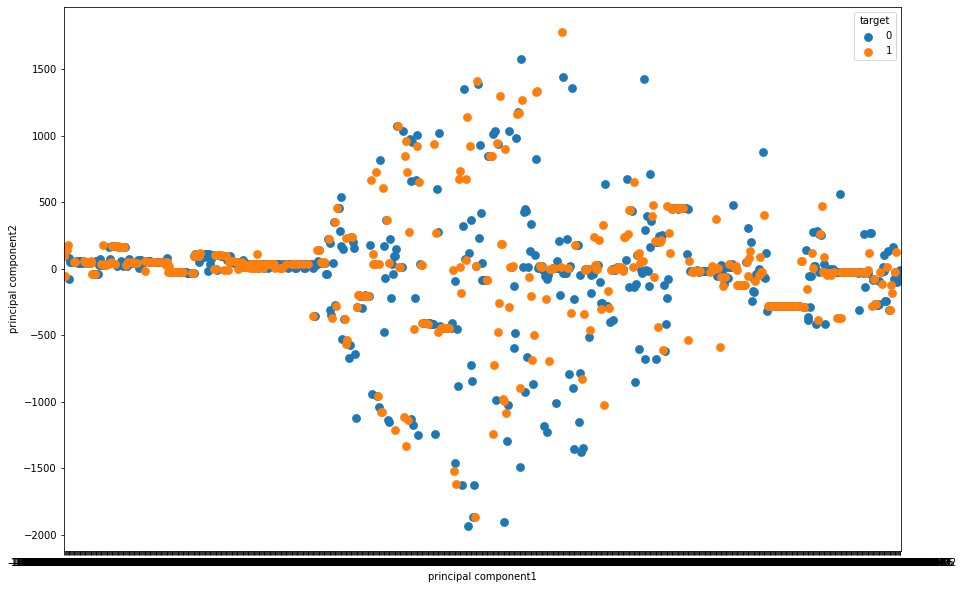

In [44]:
plt.figure(figsize=(15,10))
sns.pointplot(s.iloc[:1000,0], s.iloc[:1000,1], hue=s.iloc[:1000,2], linestyles='')

In [45]:
train_x_df.columns = list(range(len(train_x_df.columns)))
test_x_df.columns = list(range(len(test_x_df.columns)))

In [46]:
from sklearn.model_selection import train_test_split

new_train_x, new_val_x, new_train_y, new_val_y = train_test_split(train_x_df, train_y_df, test_size=0.3 ,random_state=777)

In [59]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgb_model = lgb.LGBMClassifier()

train_dataset = lgb.Dataset(new_train_x, label=new_train_y)
val_dataset = lgb.Dataset(new_val_x, label=new_val_y)

lgbm_param_grid = {
    'learning_rate' : [0.1, 0.05, 0.01],
        'max_depth' : [16,32,56,64,128],
    'objective' : ['binary'],
    'metric' : ['binary_logloss'],
    'is_training_metric' : [True],
    'num_leave' : [64,128,144,256],
    'feature_fraction' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'bagging_fraction' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'bagging_freq':[2,3,4,5,6,7],
    'seed':[2020]
}

lgbm_grid = GridSearchCV(lgb_model, param_grid=lgbm_param_grid, scoring='accuracy', n_jobs=-1, cv=3 ,verbose=10)
lgbm_grid.fit(new_train_x, new_train_y)

Fitting 3 folds for each of 29160 candidates, totalling 87480 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9],
                         'bagging_freq': [2, 3, 4, 5, 6, 7],
                         'feature_fraction': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9],
                         'is_training_metric': [True],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [16, 32, 56, 64, 128],
                         'metric': ['binary_logloss'],
                         'num_leave': [64, 128, 144, 256],
                         'objective': ['binary'], 'seed': [2020]},
             scoring='accuracy', verbose=10)

In [60]:
cv_result_df = pd.DataFrame(lgbm_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
24136,"{'bagging_fraction': 0.8, 'bagging_freq': 4, '...",0.613268,1
24139,"{'bagging_fraction': 0.8, 'bagging_freq': 4, '...",0.613268,1
24138,"{'bagging_fraction': 0.8, 'bagging_freq': 4, '...",0.613268,1
24137,"{'bagging_fraction': 0.8, 'bagging_freq': 4, '...",0.613268,1
24124,"{'bagging_fraction': 0.8, 'bagging_freq': 4, '...",0.613268,1
...,...,...,...
1676,"{'bagging_fraction': 0.1, 'bagging_freq': 5, '...",0.592182,29141
1677,"{'bagging_fraction': 0.1, 'bagging_freq': 5, '...",0.592182,29141
1678,"{'bagging_fraction': 0.1, 'bagging_freq': 5, '...",0.592182,29141
1671,"{'bagging_fraction': 0.1, 'bagging_freq': 5, '...",0.592182,29141


In [63]:
{'bagging_fraction': 0.8,
 'bagging_freq': 4,
 'feature_fraction': 0.7,
 'is_training_metric': True,
 'learning_rate': 0.1,
 'max_depth': 128,
 'metric': 'binary_logloss',
 'num_leave': 64,
 'objective': 'binary',
 'seed': 2020}

{'bagging_fraction': 0.8,
 'bagging_freq': 4,
 'feature_fraction': 0.7,
 'is_training_metric': True,
 'learning_rate': 0.1,
 'max_depth': 128,
 'metric': 'binary_logloss',
 'num_leave': 64,
 'objective': 'binary',
 'seed': 2020}

In [103]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

params = {
    'learning_rate' : 0.05,
        'max_depth' : 128,
    'objective' : 'binary',
    'metric' : 'binary_logloss',
    'is_training_metric' : True,
    'num_leave' : 64,
    'feature_fraction' : 0.7,
    'bagging_fraction' : 0.8,
    'bagging_freq':5,
    'seed':2020
}

train_dataset = lgb.Dataset(new_train_x, label=new_train_y)
val_dataset = lgb.Dataset(new_val_x, label=new_val_y)

model = lgb.train(params, train_dataset, 2000, val_dataset, verbose_eval=200, early_stopping_rounds=100)

pred_y = model.predict(new_val_x)
pred_y = [1 if i>0.5 else 0 for i in pred_y]
accuracy_score(new_val_y, pred_y)  
# 0.6171755674498294
# 0.6222225173654922
# 0.6269440718260662 -> 0.64806  // 2021-12-23 14:54
# 0.6292749658002736 

# 0.6118177770033494

# 0.6306296734092147  -> 2021-12-28 15:25:05	0.644898965

# 0.6308421765635583

[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 175481, number of negative: 175884
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5289
[LightGBM] [Info] Number of data points in the train set: 351365, number of used features: 56
[LightGBM] [Warning] Unknown parameter: num_leave
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:Boos

0.6306429548563611

In [106]:
pred_y = model.predict(test_x_df)
pred_y = [1 if i>0.5 else 0 for i in pred_y]
submission_df['target'] = pred_y
submission_df.to_csv('sub11.csv', index=False)

In [32]:
## DNN 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(87,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(new_train_x,
                    new_train_y,
                    epochs=1000,
                    batch_size=512,
                    validation_data=(new_val_x, new_val_y))
results = model.evaluate(new_val_x, new_val_y)
results

# Epoch 725/1000
# 687/687 [==============================] - 2s 2ms/step - loss: 0.6474 - accuracy: 0.6095 - val_loss: 0.6670 - val_accuracy: 0.5998

pred_y = model.predict(new_val_x)
pred_y = [1 if i>0.5 else 0 for i in pred_y]

accuracy_score(pred_y, new_val_y)  # 0.5975323071201838